In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
from matplotlib.transforms import Bbox

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import DotProduct

cmaps = plt.get_cmap("Dark2")
print(cmaps.colors)
mpl.rcParams['font.weight']='normal'

mpl.rcParams['font.size']=16 #10 #16 pour posts
mpl.rcParams['legend.fontsize']=12 #10 12 pour posts

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667), (0.8509803921568627, 0.37254901960784315, 0.00784313725490196), (0.4588235294117647, 0.4392156862745098, 0.7019607843137254), (0.9058823529411765, 0.1607843137254902, 0.5411764705882353), (0.4, 0.6509803921568628, 0.11764705882352941), (0.9019607843137255, 0.6705882352941176, 0.00784313725490196), (0.6509803921568628, 0.4627450980392157, 0.11372549019607843), (0.4, 0.4, 0.4))


In [24]:
def plot_gpr_samples(gpr_model, n_samples, ax1,ax2,ls,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax2.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
            color=color_list[idx]
        )
    ax2.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax2.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax2.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax2.set_xlabel("x")
    #ax2.set_ylabel("GP(x)")
    ax2.set_xlim([0, 5])
    ax2.set_ylim([-3, 3])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))
    ax1.plot(X[:,0],gpr_model.kernel.__call__(X,Y,eval_gradient=False)[:,0],color="black",linestyle=ls,label=kernelname)
    #ax1.scatter(0,1,color='black',label=kernelname,s=50)
    ax1.set_xlim(0,5)
    ax1.set_ylim(0,1.2)
    print()

def plot_gpr_samples_diagonal(gpr_model, n_samples, ax1,ax2,ls,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax2.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
            color=color_list[idx]
        )
    ax2.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax2.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax2.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax2.set_xlabel("x")
    ax2.set_xlim([0, 5])
    ax2.set_ylim([-3, 3])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))
    #ax1.plot(X[:,0],gpr_model.kernel.__call__(X,Y,eval_gradient=False)[:,0],color="black",linestyle=ls,label=kernelname)
    ax1.scatter(0,1,color='black',label=kernelname,s=50)
    X=np.linspace(0,5,100)
    Y=np.linspace(0,0,100)
    ax1.plot(X,Y,color='black',lw=6)
    ax1.set_xlim(0,5)
    ax1.set_ylim(0,1.2)
    ax1.set_ylabel('correlation')
    ax1.set_xlabel('distance')
    print()
    
def plot_gpr_samples2(gpr_model, n_samples, ax1,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax1.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            color=color_list[idx]
        )
    ax1.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax1.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax1.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax1.set_xlabel("x")
    ax1.set_ylabel("GP(x)")
    ax1.set_xlim([0, 5])
    #ax1.set_ylim([-10, 10])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))

    print()
    
def plot_gpr_samples3(gpr_model, n_samples, ax,ls,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
            color=color_list[idx]
        )
    ax.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_xlim([0, 5])
    ax.set_ylim([-3, 3])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))
    print()
    
def plot_gpr_samples4(gpr_model, n_samples, ax,ls,kernelname):
    x = np.linspace(0, 1, 1000)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            label=f"Sampled function #{idx + 1}",
            color=color_list[idx]
        )
    ax.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax.set_xlabel("x")
    ax.set_ylabel("z")
    ax.set_xlim([0, 1])
    #ax.set_ylim([-3, 3])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))
    print()
    

In [5]:
#fonction pour afficher une fct de cov et des samples
def plot_samples1(kernel,rs,name,filename):
    gpr=GaussianProcessRegressor(kernel=kernel, random_state=rs)
    fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(9, 3))
    plot_gpr_samples(gpr,3, ax1,ax2,'-',name)
    ax1.legend()
    plt.tight_layout()
    fig.savefig(filename+'.png')
    
def plot_samples_diagonal(kernel,rs,name,filename):
    gpr=GaussianProcessRegressor(kernel=kernel, random_state=rs)
    fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1, figsize=(9, 3.5))
    plot_gpr_samples_diagonal(gpr,3, ax1,ax2,'-',name)
    #ax1.legend()
    plt.tight_layout()
    fig.savefig(filename+'.png')
    
    
def plot_samples(k1,k2,k3,rs,names,filename):
    gpr1=GaussianProcessRegressor(kernel=k1, random_state=rs)
    gpr2=GaussianProcessRegressor(kernel=k2, random_state=rs)
    gpr3=GaussianProcessRegressor(kernel=k3, random_state=rs)
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2, figsize=(9, 7))
    plot_gpr_samples(gpr1,3, ax1,ax2,'-',names[0])
    plot_gpr_samples(gpr2,3, ax1,ax3,'--',names[1])
    plot_gpr_samples(gpr3,3, ax1,ax4,':',names[2])
    ax1.set_xlabel("distance")
    ax1.set_ylabel("correlation")
    ax1.legend()
    plt.tight_layout()

    fig.savefig(filename+'.png')
    
    
    
def plot_samples2(k1,k2,k3,rs,names):
    gpr1=GaussianProcessRegressor(kernel=k1, random_state=rs)
    gpr2=GaussianProcessRegressor(kernel=k2, random_state=rs)
    gpr3=GaussianProcessRegressor(kernel=k3, random_state=rs)
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1, figsize=(14, 4))
    plot_gpr_samples2(gpr1,5, ax1,names[0])
    plot_gpr_samples2(gpr2,5, ax2,names[1])
    plot_gpr_samples2(gpr3,5, ax3,names[2])
    plt.tight_layout()
    

def plot_samples3(kernel,rs,name):
    gpr=GaussianProcessRegressor(kernel=kernel, random_state=rs)
    fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(4, 3))
    plot_gpr_samples3(gpr,3,ax,'-',name)
    ax.set_title(name)
    
def plot_samples4(kernel,rs,name):
    gpr=GaussianProcessRegressor(kernel=kernel, random_state=rs)
    fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(4, 3))
    plot_gpr_samples4(gpr,3,ax,'-',name)
    ax.set_title(name)
    
    
rs=np.random.RandomState(68436697)

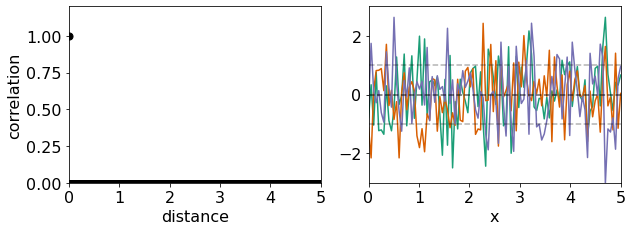

In [6]:
kernel=RBF(length_scale=1e-5)
plot_samples_diagonal(kernel,rs,'Diagonal','diagonal')

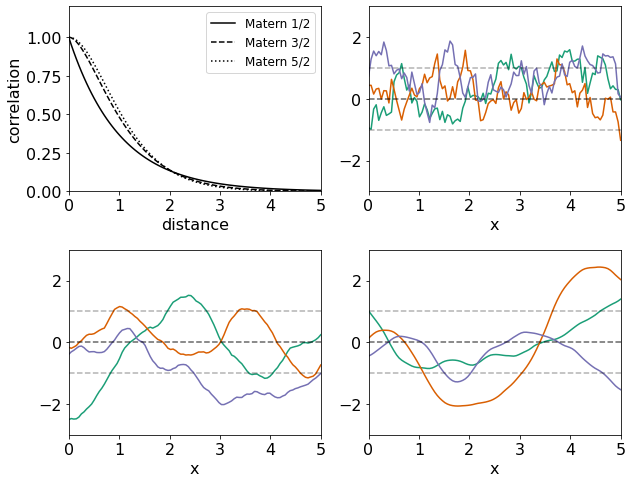

In [7]:
sigma=[1,2,5]
l=[1,4,25]
nu=0.5


k1=Matern(length_scale=1,nu=0.5)
k2=Matern(length_scale=1,nu=1.5)
k3=Matern(length_scale=1,nu=2.5)
names=['Matern 1/2','Matern 3/2','Matern 5/2']
plot_samples(k1,k2,k3,rs,names,'maternsamples')

In [8]:
kernel=RBF(length_scale=1.0)
plot_samples1(kernel,rs,'Squared exponential')

TypeError: plot_samples1() missing 1 required positional argument: 'filename'

In [ ]:

l=[1,0.5,5]



k1=RBF(length_scale=l[0])
k2=RBF(length_scale=l[1])
k3=RBF(length_scale=l[2])
names=[r'$l=1$',r'$l=0.5$',r'$l=5$']
plot_samples(k1,k2,k3,rs,names,'sesamples')

In [ ]:
sigma=[1,2,5]
l=[1,4,25]
nu=0.5


k1=sigma[0]**2*Matern(length_scale=l[0],nu=nu)
k2=sigma[1]**2*Matern(length_scale=l[1],nu=nu)
k3=sigma[2]**2*Matern(length_scale=l[2],nu=nu)
names=['Matern 1/2','Matern 3/2','Matern 5/2']
plot_samples2(k1,k2,k3,rs,names)

In [ ]:
def plot_gpr_samples2p(gpr_model, n_samples, ax1,kernelname):
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples,random_state=gpr_model.random_state)
    color_list=cmaps.colors
    for idx, single_prior in enumerate(y_samples.T):
        ax1.plot(
            x,
            single_prior,
            linestyle="-",
            alpha=1,
            color=color_list[idx]
        )
    ax1.plot(x, y_mean, color="black",linestyle="--",alpha=0.6)
    ax1.plot(x, y_mean-y_std, color="black",linestyle="--",alpha=0.3)
    ax1.plot(x, y_mean+y_std, color="black",linestyle="--",alpha=0.3)
    #ax2.fill_between(x,y_mean - y_std,y_mean + y_std,alpha=0.1,color="black",label=r"$\pm$ 1 std. dev.", )
    ax1.set_xlabel("x")
    ax1.set_ylabel("GP(x)")
    ax1.set_xlim([0, 1])
    ax1.set_ylim([-1, 1])
    #plot de la covariance
    X=np.reshape(np.linspace(0,5,100),(100,1))
    Y=np.reshape(np.zeros(100),(100,1))

    print()

def plot_samples2p(k1,k2,k3,rs,names):
    gpr1=GaussianProcessRegressor(kernel=k1, random_state=rs)
    gpr2=GaussianProcessRegressor(kernel=k2, random_state=rs)
    gpr3=GaussianProcessRegressor(kernel=k3, random_state=rs)
    fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1, figsize=(14, 4))
    plot_gpr_samples2p(gpr1,5, ax1,names[0])
    plot_gpr_samples2p(gpr2,5, ax2,names[1])
    plot_gpr_samples2p(gpr3,5, ax3,names[2])
    plt.tight_layout()

sigma=[0.1,0.3,0.5]
l=0.4,0.4,0.4

k1=sigma[0]**2*RBF(length_scale=l[0])
k2=sigma[1]**2*RBF(length_scale=l[1])
k3=sigma[2]**2*RBF(length_scale=l[2])
names=['RBF1','RBF2','RBF3']
plot_samples2p(k1,k2,k3,rs,names)
    

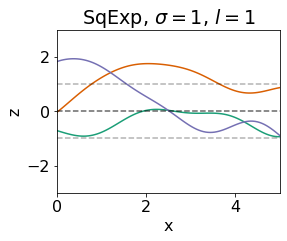

In [12]:
kernel=RBF(length_scale=1.0)
plot_samples3(kernel,rs,r'SqExp, $\sigma=1$, $l=1$')

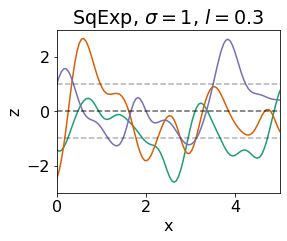

In [35]:
kernel=RBF(length_scale=0.3)
plot_samples3(kernel,rs,r'SqExp, $\sigma=1$, $l=0.3$')

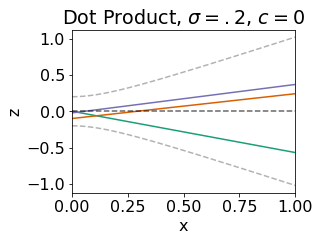

In [34]:
kernel=DotProduct(sigma_0=.2)
plot_samples4(kernel,rs,r'Dot Product, $\sigma=.2$, $c=0$')

/home/catB/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:410: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


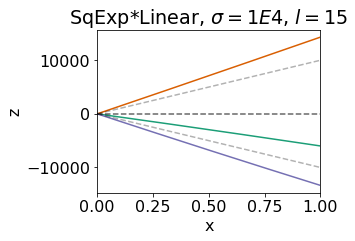

In [29]:
sigma=1E4
kernel=RBF(length_scale=30)
kernel2=DotProduct(sigma_0=0)
k=kernel*kernel2*sigma**2
plot_samples4(k,rs,r'SqExp*Linear, $\sigma=1E4$, $l=15$')